# Overview of Machine Learning for Food Sciences

## Introduction to Machine Learning

Probably you should have heard a lot about "Machine Learning" so far, and fairly you might have asked yourself: What does it mean? Machine Learning lies in the intersection between computer science and statistics/mathematics. The first to coin a definition for machine learning was Arthur Samuel in 1959. According to Samuel, ***"machine learning is the field of study  that gives computers the ability to learn without being explicitly programmed"***.

**The main goal of Machine Learning is to extract "meaning" from data**. This "meaning" is in practice represented as a **mathematical equation that best describes the data**. In a philosophical perspective, Machine Learning is used to get knowledge from data. By using this extracted knowledge it is possible to make useful predictions.

Although sometimes it might not be evident, machine learning algorithms are vastly part of our lives. Some simple examples in your everyday lives would be the face-detection features in our smartphones, the voice assistants in our electronic devices, spam filters in our emails, etc. Other areas were the usage of machine learning is gathering momentum is medicine: machine learning algorithms can detect diseases with high accuracy, they can also be used to predict efficiency of different drug combinations which normally is an extremely time-consuming process.

[Figure 1](#ml-model) shows a high level view of the process of building a machine learning model. Everything begins by pre-processing the raw data. After we polish it and make it usable by the machine learning models, we split the **processed data** into two parts: **the training data** and **the testing data**. The **training data** is fed into the model so that it can learn a good mathematical representation of it. The **process of building the model** consist of several  steps. When we build the model, we do not give it all the data that we have. The reasons for the split will become evident in [the train-test split section below](#train-test-split). Then we choose a specific machine learning model. **The model is trained on the training data**. After the model training si done, we can use it to predict some results on the test data, outputing the **predicted outputs**. Given model predictions, we can check how the model has performed. This happens because we iteratively train the model, check how it performs on unseen data and then, if the results are not good we go back to training and repeat the process until we reach some satisfactory results. When it reaches an optimal performance we assume the model is ready to be used in real world scenarions.
How do we determine whether a model is performing well or how do we measure the performance it depends on the task at hand. We will see some examples later on.


<center>
<a id="ml-model"></a>
<img src="images/ml_pipeline.jpg" alt="Machine Learning Model" width="75%">
<center><figcaption><em>Fig 1: Building a machine learning model</em></figcaption></center>
</center>

Generally, there are 4 types of machine learning algorithms: *supervised learning*, *unsupervised learning*, *semi-supervised learning* and *reinforcement learning*. In this series of tutorials we will explore supervised and unsupervised learning algorithms.

**Supervised Learning** - in this setting we aim to build a model that will learn the data the best and will be able to predict future values. The data points that the model uses to learn, already have the corresponding outputs. This is how the model is able to derive a connection between inputs and outputs. There are two types of problems in the supervised setting: *regression* and *classification*. In **regression**, the output that the model learns and then tries to predict is a continuous value. In **classification**, the output that the model learns and then tries to predict is a categorical value. 

**Unsupervised Learning** - in this setting, the data that we have does not have any values or categories that we can learn and later predict. Here, the models will try to find a structure in the data, or learn patterns present. Some use cases of such models would be: clustering, dimensionality reduction, data generation, anomaly detection etc. In the case of clustering, we try to find groups within the data, so that we can group similar samples together. In the case of dimensionality reduction, we move from data with many features, to compressed data, with very few features. 

We will study these types in detail in the following tutorials.

To conclude this section, let us emphasize again the "power" of Machine Learning. By using Machine Learning algorithms, we can (refere to the lighbulbs in [Figure 1](#ml-model)):
1. learn patterns/realtionships in our data that might not be clearly evident 
2. perform predictions on new data 

## Where Machine Learning is Used in Food Science?[to be discussed with field experts....]

Like in many other areas, machine learning is quite useful even when it comes to Food Science. There are different applications in diverse areas that include: quality control, sensory analysis, food safety, product development, etc. 
In the case of quality control, machine learning models can help people  to identify flaws in the food production process that may be related to contamination or other defects. When it comes to sensory analysis, machine learning models can use past data to understand consumer preferences and give suggestions on new products that can be developed. Machine learning can be useful in case of food safety as well since they can be used to analyze data from microbiological test results to predict possible contamination scenarios. Lastly, it can help taylor the product development to not only make it efficient, but to also find trends and customer preferences in order to maximize profits.
All in all, everyday and more, machine learning is playing an increasing role in food science. 

## Datasets Used during the Tutorials

[To be completed in the very end...]

## Data Processing for Machine Learning Methods

Since ML models are built from data, the performance of the trained models depends on the quality of the data fed into the model. So, to build robust machine learning algorithms, data quality is very important. In most of the cases the data that we get is raw. If we use it as it is, the model may not be able to learn many useful characteristics. Thus, we need to pre-process the data by applying different techniques, so that it can be useful to the model. Below we brief some of these techniques.

The preprocessing steps that we will apply to make the data usable will be:
1. Data Quality Control
2. Train-Test split
3. Standardization

In the following sections we will explore how each of the above mentioned steps is performed and how we end up with data that is ready to be used in a machine learning model. But first, let us explore our original dataset.

### Anatomy of our data

By **data** we refer to the **collection of samples** obtained through different experimental procedures. Usually, machine learning models work with data in tabular format. In machine learning notation, we denote **the number of samples by m** and **the number of features by n**. By the number of samples we mean the number fo data points. While features determine the characteristics of each of these data points. The machine learning models use these features to learn insights and to construct a mathematical equation that will represent the data.

Let us illustrate this with our dataset.

The first thing to do is to import the python modules that we will need for reading the data and then for processing. 
What you see below are some of the most importnant modules. We will use the `train_test_split` function of the `sklearn.model_selection` module later to do the train-test split. We will use the `pandas` library to read and interact with the data. `math` is another library that we will use throughout our pre-processing steps. This provides different mathemtical functions.


In [1]:
from sklearn.model_selection import train_test_split
import pandas as pd
import math

When the above cell finishes running succesfully, you will see `[1]`, in the bottom left corner of the box. This means that the packages are loaded and ready to be used. After this, we are ready to read the data.

#### Load the data

We will use the `read_csv` function of the `pandas` library to read the dataset. The dataset is in a `.csv` (comma separated values) file and we will save it in a **pandas dataframe**. Note that here we use the alias of the `pandas` library `pd`. We deined it in the above code cell with the `as` clause. 

After reading the dataset, we use the `head()` method of the `dataset` dataframe to see the data.

In [2]:
dataset = pd.read_csv('data/swiss_food_composition_database.csv')
dataset.head()

,name,category,energy_kcal,fat_g,fatty_acids_sat_g,fatty_acids_monounsat_g,fatty_acids_polyunsat_g,cholesterol_mg,carbohydrates_g,sugars_g,...,potassium_mg,sodium_mg,chloride_mg,calcium_mg,magnesium_mg,phosphorus_mg,iron_mg,iodide_µg,zinc_mg,selenium_µg
0,Agar Agar,Various/Gelling and binding agents,160.0,0.2,NaN,NaN,NaN,NaN,0.0,NaN,...,52.0,130.0,NaN,660.0,100.0,34.0,4.5,NaN,1.5,NaN
1,Agave syrup,Sweets/Sugar and sweeteners,293.0,0.0,0.0,NaN,NaN,NaN,73.1,NaN,...,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Almond,"Nuts, seeds and oleaginous fruit",624.0,52.1,4.1,31.4,11.4,0.0,7.8,6.6,...,740.0,1.1,40.0,270.0,240.0,510.0,3.3,0.2,3.3,2.2
3,"Almond, dry roasted, salted","Savoury snacks/Salted nuts, seeds and kernels",637.0,52.5,4.1,33.1,13.0,0.0,10.1,4.9,...,710.0,230.0,1190.0,270.0,280.0,470.0,3.7,2.4,3.3,2.0
4,"Almond, roasted, salted","Savoury snacks/Salted nuts, seeds and kernels",649.0,55.2,4.2,34.8,13.5,0.0,7.2,4.6,...,670.0,330.0,1190.0,240.0,270.0,470.0,3.3,2.4,3.1,2.0


Each **row** is a called a **sample**. Each **column** represent a **feature**, or in other words a characteristic of a sample. In order to find how many samples and features we have, we can use the `shape` attribute of the `dataset` dataframe. 

In [3]:
dataset.shape

(1092, 41)

As we can see from the ouput above, there are 1092 samples (rows) and 41 features (columns). `shape` returns a tuple with 2 values, the first one is the number of samples (rows) and the second one is the number of features (columns). As you can see, it shows 1092 rows and 41 columns.

### Data Quality Control

Usually, the first step in the data pre-processing phase is to assess the quality of our data. There are different ways how to inspect this and here we will explore some of them.

#### Find number of missing values

Let us start by getting some information regarding what type of data the dataset contains. For this we will use the `info()` method of the `dataset` dataframe. Besides listing the data types of each column, it shows how many non-empy (`non-null`) values are there for each feature.

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1092 entries, 0 to 1091
Data columns (total 41 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   name                       1092 non-null   object 
 1   category                   1092 non-null   object 
 2   energy_kcal                1092 non-null   float64
 3   fat_g                      1092 non-null   float64
 4   fatty_acids_sat_g          1087 non-null   float64
 5   fatty_acids_monounsat_g    1085 non-null   float64
 6   fatty_acids_polyunsat_g    1085 non-null   float64
 7   cholesterol_mg             1080 non-null   float64
 8   carbohydrates_g            1092 non-null   float64
 9   sugars_g                   1087 non-null   float64
 10  starch_g                   1038 non-null   float64
 11  fibres_g                   1091 non-null   float64
 12  protein_g                  1092 non-null   float64
 13  salt_g                     1092 non-null   float

As we see, most of the columns hold decimal values, which in Python corresponds to the **float64** data type.
The first two columns, `Name` and `Category` are `strings` (sequences of characters) and `pandas` recognizes them as objects.

The missing values in the dataset are recorded as `NaN`s. Let us look at an example: 

In [5]:
dataset.iloc[0:1, :]

,name,category,energy_kcal,fat_g,fatty_acids_sat_g,fatty_acids_monounsat_g,fatty_acids_polyunsat_g,cholesterol_mg,carbohydrates_g,sugars_g,...,potassium_mg,sodium_mg,chloride_mg,calcium_mg,magnesium_mg,phosphorus_mg,iron_mg,iodide_µg,zinc_mg,selenium_µg
0,Agar Agar,Various/Gelling and binding agents,160.0,0.2,NaN,NaN,NaN,NaN,0.0,NaN,...,52.0,130.0,NaN,660.0,100.0,34.0,4.5,NaN,1.5,NaN


In the above example, we see that for `Agar Agar` we do not have a value for `fatty_acids_sat_g`, `fatty_acids_monounsat_g`, `fatty_acids_polyunsat_g`, etc.

#### Removing features with a lot of missing values

The features (columns) that have a lot of missing values will not be useful for the models. That is why we need to remove them. Determing what *a lot* means depends on the context and task at hand. In our case, we will remove the feature that have more than 20% of the values missing. For this we will need to find the actual minimum number of rows that have to contain a value per feature so that they will be kept. Since we will remove features that have more than 20% of the data missing, we will keep those that have at least 80%. We have 1092 samples in total, this means that we will keep features that have at least $$\left\lceil 0.8*1092=873.6\right\rceil = 874$$ non-missing values. 

First, we will print the number of `NaN` values per column.

In [6]:
nan_total_col = dataset.isna().sum(axis=0)
nan_total_col

name                           0
category                       0
energy_kcal                    0
fat_g                          0
fatty_acids_sat_g              5
fatty_acids_monounsat_g        7
fatty_acids_polyunsat_g        7
cholesterol_mg                12
carbohydrates_g                0
sugars_g                       5
starch_g                      54
fibres_g                       1
protein_g                      0
salt_g                         0
alcohol_g                      4
water_g                        2
vit_A_activity_re_µg          13
vit_A_activity_rae_µg         13
retinol_µg                    10
beta_carotene_activity_µg     19
beta_carotene_µg              21
vit_B1_mg                      7
vit_B2_mg                      6
vit_B6_mg                      7
vit_B12_µg                    10
niacin_mg                     40
folate_µg                     17
panthotenic_acid_mg           12
vit_c_mg                      13
vit_d_µg                      11
vit_e_acti

From the list above, we will remove all columns that have more than 1092-874 = 218 missing values. Only the `selenium_µg` has more than 218 missing values.

The above code cell does the following:

It checks each value of the dataset and marks it with 1 if it is a `nan` and with a 0 otherwise. Then, it computes the sum of each column using the `sum()` method with the `axis=0`. In this way we find the number of 1s per column, which means the number of values that are `nan`s per column. You can find a visual explanation on [Figure 5](#boolean-mask-illustration) below.

Now we can drop the columns that have more than 20% of the values missing:

In [7]:
feature_threshold = math.ceil(0.8*dataset.shape[0]) # 20% of values missing
feature_threshold

874

In [8]:
columns_before = dataset.columns
dataset = dataset.dropna(axis=1, thresh=feature_threshold)
columns_after = dataset.columns
columns_after

Index(['name', 'category', 'energy_kcal', 'fat_g', 'fatty_acids_sat_g',
       'fatty_acids_monounsat_g', 'fatty_acids_polyunsat_g', 'cholesterol_mg',
       'carbohydrates_g', 'sugars_g', 'starch_g', 'fibres_g', 'protein_g',
       'salt_g', 'alcohol_g', 'water_g', 'vit_A_activity_re_µg',
       'vit_A_activity_rae_µg', 'retinol_µg', 'beta_carotene_activity_µg',
       'beta_carotene_µg', 'vit_B1_mg', 'vit_B2_mg', 'vit_B6_mg', 'vit_B12_µg',
       'niacin_mg', 'folate_µg', 'panthotenic_acid_mg', 'vit_c_mg', 'vit_d_µg',
       'vit_e_activity_mg', 'potassium_mg', 'sodium_mg', 'chloride_mg',
       'calcium_mg', 'magnesium_mg', 'phosphorus_mg', 'iron_mg', 'iodide_µg',
       'zinc_mg'],
      dtype='object')

Let's explain what the above code does line by line. 
In the first code cell we declare a variable, `feature_threshold = math.ceil(0.8*dataset.shape[0])` to be the threshold according to which we are discarding columns. It gets the number of samples using the first entry of the `dataset.shape` attribute which returns a `tuple`. Then, we save the columns we had previously in order to see later what was removed. Afterwards, we apply the `dropna()` method of a pandas dataframe to drop all columns (determined by the `axis=1` argument), that have less than `feature_threshold` non-missing values. We save the columns aftre the drop as well.

In [9]:
columns_before.difference(columns_after)

Index(['selenium_µg'], dtype='object')

The `difference` method does simply set difference on the two lists specified. As you can see, `selenium_µg` is not present anymore in the columns list. The code cell below counts the number of columns. Now we have 40 columns, from 41 that we had before.

In [10]:
len(dataset.columns)

40

#### Removing samples with a lot of missing values

Now we will do the same but row-wise. We will remove the samples that have more than  20% of the values missing. This means that we will keep the samples that have more than 80% of the features. With some quick math we find that: $$\left\lceil0.8*40 = 32\right\rceil = 32$$ This means that we will keep the samples that have 32 or more features.

In [11]:
nan_total_rows = dataset.isna().sum(axis=1)
nan_total_rows

0       24
1       30
2        0
3        0
4        0
        ..
1087     0
1088     0
1089     0
1090     0
1091     0
Length: 1092, dtype: int64

The code cell above finds the number of missing values per each sample. This time we sum row-wise by specifying the `axis=1` argument in the `sum()` method. [Figure 5](#boolean-mask-illustration) illustrates how the `isna()` and `sum()` methods work to calculate the number of `NaN`s per each sample and per each feature. After creating the boolean masks ('tables' with 0s and 1s), it finds the sum per row or per column, based on the `axis` value we pass as argument to `sum()` and find the number of missing values.

<center>
    <a id="boolean-mask-illustration"></a>
    <img src="images/rows_columns_nans.jpg" alt="Rows and columns boolean mask" width="75%">
    <center><figcaption><em>Fig 5: Boolean mask of NaNs for rows and columns</em></figcaption></center>
</center>

After finding the number of missing values per row, we will remove the rows that have more than 20% of the values missing:

In [12]:
row_threshold = math.ceil(0.8*dataset.shape[1]) # 20% of values missing
row_threshold

32

We declare `row_threshold = math.ceil(0.8*dataset.shape[1])` to be the threshold according to which we are discarding rows. It gets the number of features using the second entry of the `dataset.shape` attribute which returns a `tuple`.

In [13]:
rows_before = dataset.index
dataset = dataset.dropna(axis=0, thresh=row_threshold)
rows_after = dataset.index
dataset.shape

(1084, 40)

From 1092 samples, now we have 1084.

In [14]:
rows_before.difference(rows_after)

Int64Index([0, 1, 83, 84, 898, 899, 1022, 1057], dtype='int64')

Again we apply the `difference()` method to find the positions of the samples that were dropped.

After removing the features and samples that had a lot of missing values, we have a dataset with 1084 samples and 40 features. Note that our dataset still has missing features and we will deal with that in the subsequent sections.

#### Outlier detection[work in progress...]

Before we continue our data quality analysis further we have to deal with the missing data. Below we will see how to *impute* the dataset.

#### Dealing with missing data[work in progress...]

There are several ways to deal with missing data. The easiest and most drastic one is to completely remove the samples (rows) that have missing data. We cannot apply this here because we would have to delete more than 70% of the dataset, meaning that we would have to few samples to do any meaningful analysis. Other approaches are related to imputing the dataset. This means that the we will replace the missing values with some characteristic values for the features. For example, we can decide to substitute missing values in a column with the mean value for that feature. Likewise we can substitute them with the median or mode values. You can find more imputation techniques in the [sklearn documentation](https://scikit-learn.org/stable/modules/impute.html).

Here we will impute the missing values with the mean of the features.

### Train-Test Split

Although in practice it happens after the real data preprocessing, sometimes it is considered to be part of the data pre-processing phase. As you can see from [Fig. 5](#train_test), before the machine learning model is trained, the data is split in two parts: the **training data** and the **testing data**. Usually we use 70-80% of the whole dataset for training and the remaining 20-30% for testing. The reason that we do this is to be able to quantify how well the model has learned the characteristics of the data. If the performance indicators will be great in the test part than we know that the model has learned the data well. If we see that performance indicators show poor results on the test set that this means that our model might have just "learned by heart".

<center><a id="train_test"></a>
<img src="images\train_test_split.jpg" alt="Unsupervised learning clustering and dimensionality reduction" width="75%">
<center><figcaption><em>Fig 5: Train-Test Split</em></figcaption></center>
</center>

In order to better understand this, let us make an analogy to your courses at ETH. When you go and sit in an exam, you rarely or never find exactly the same questions that you have seen during the exercise sessions or classes. Also, you never know in advance which questions will be asked in the exam. The reason for all this constraints is that the professors want to evaluate you based on what you have understood from the course. If you already knew the questions of the exam you can easily prepare them beforehand, try to memorize the answers even if you understand nothing and then you get a really good grade from the course. But what happens next is that when you start working outside the doors of the university, you will probably not be able to solve the tasks at hand because of lack of understanding of certain concepts and set of skills. 

This is exactly what we want to avoid when training machine learning models. In the machine learning jargon, we want to have models that generalize well. This means that they can properly solve tasks which they have not encountered during training. And they can do perfectly so, if the training was successful and they have gained insights on data. In our analogy from above, if the students understand the concepts and can put them to practice, then they can be flexible in their jobs and solve tasks that they might not have encountered during the studies. All this happens because they will have the necessary set of skills from their training (education) years. 

Below you can see how we can split in practice a dataset.
For the splitting we will use the `train_test_split()` method from the `model_selection` module of the `sklearn` library, that we have imported above.

In [ ]:
train_set, test_set = train_test_split(dataset, test_size=0.2, random_state=0)

We pass three arguments to the method. The first one is the dataset that will be split. The second one `test_size` determines teh portion of the data that will be used for testing. Here we specify that `20%=0.2` will be used for testing, thus implicitly the remaining 80% for training. The method, depending on whether we pass the whole dataset or the features and the labels separately, will return 2 new dataframes in the first case (1x for the train set and 1x for the test set) or 4 new dataframes in the second case (1x for the train_features, 1x for the test features, 1x for the train labels and 1x for the test labels). The third argument, `random_state=0` makes sure that no matter how many times we execute the above code cell, it will produce the same split all the times. This means that the `train_set` and `test_set` will always have the same samples. If we omit that argument, then `train_set` and `test_set` will have different samples each time we execute the cell.

In order to make sure that the split is correct let us check the sizes of the new dataframes.

In [16]:
print("Shape of original dataset: ", dataset.shape)
print("Shape of train dataset: ", train_set.shape)
print("Shape of test dataset: ", test_set.shape)

Shape of original dataset:  (1084, 40)
Shape of train dataset:  (867, 40)
Shape of test dataset:  (217, 40)


This confirms our desired proportions for the split.

### Standardization

Standardization is the process of transforming or rescaling the values of certain features so that they are comparable. This process is useful to the underlying steps of machine learning algorithms in finding the best model that can generalize the data. The formula for standardizing the values of a single feature column would be: $$ X^{(i)}_s = \frac{X^{(i)}-\mu}{\sigma} ,$$ where $X^{(i)}_s$ is the standardized value for sample `i`, $X^{(i)}$ is the original value of the feature for sample `i`, $\mu$ is the mean of all values of the feature (the whole column) and $\sigma$ is the standard deviation of all the values of that feature. We can depict this graphically as follows:
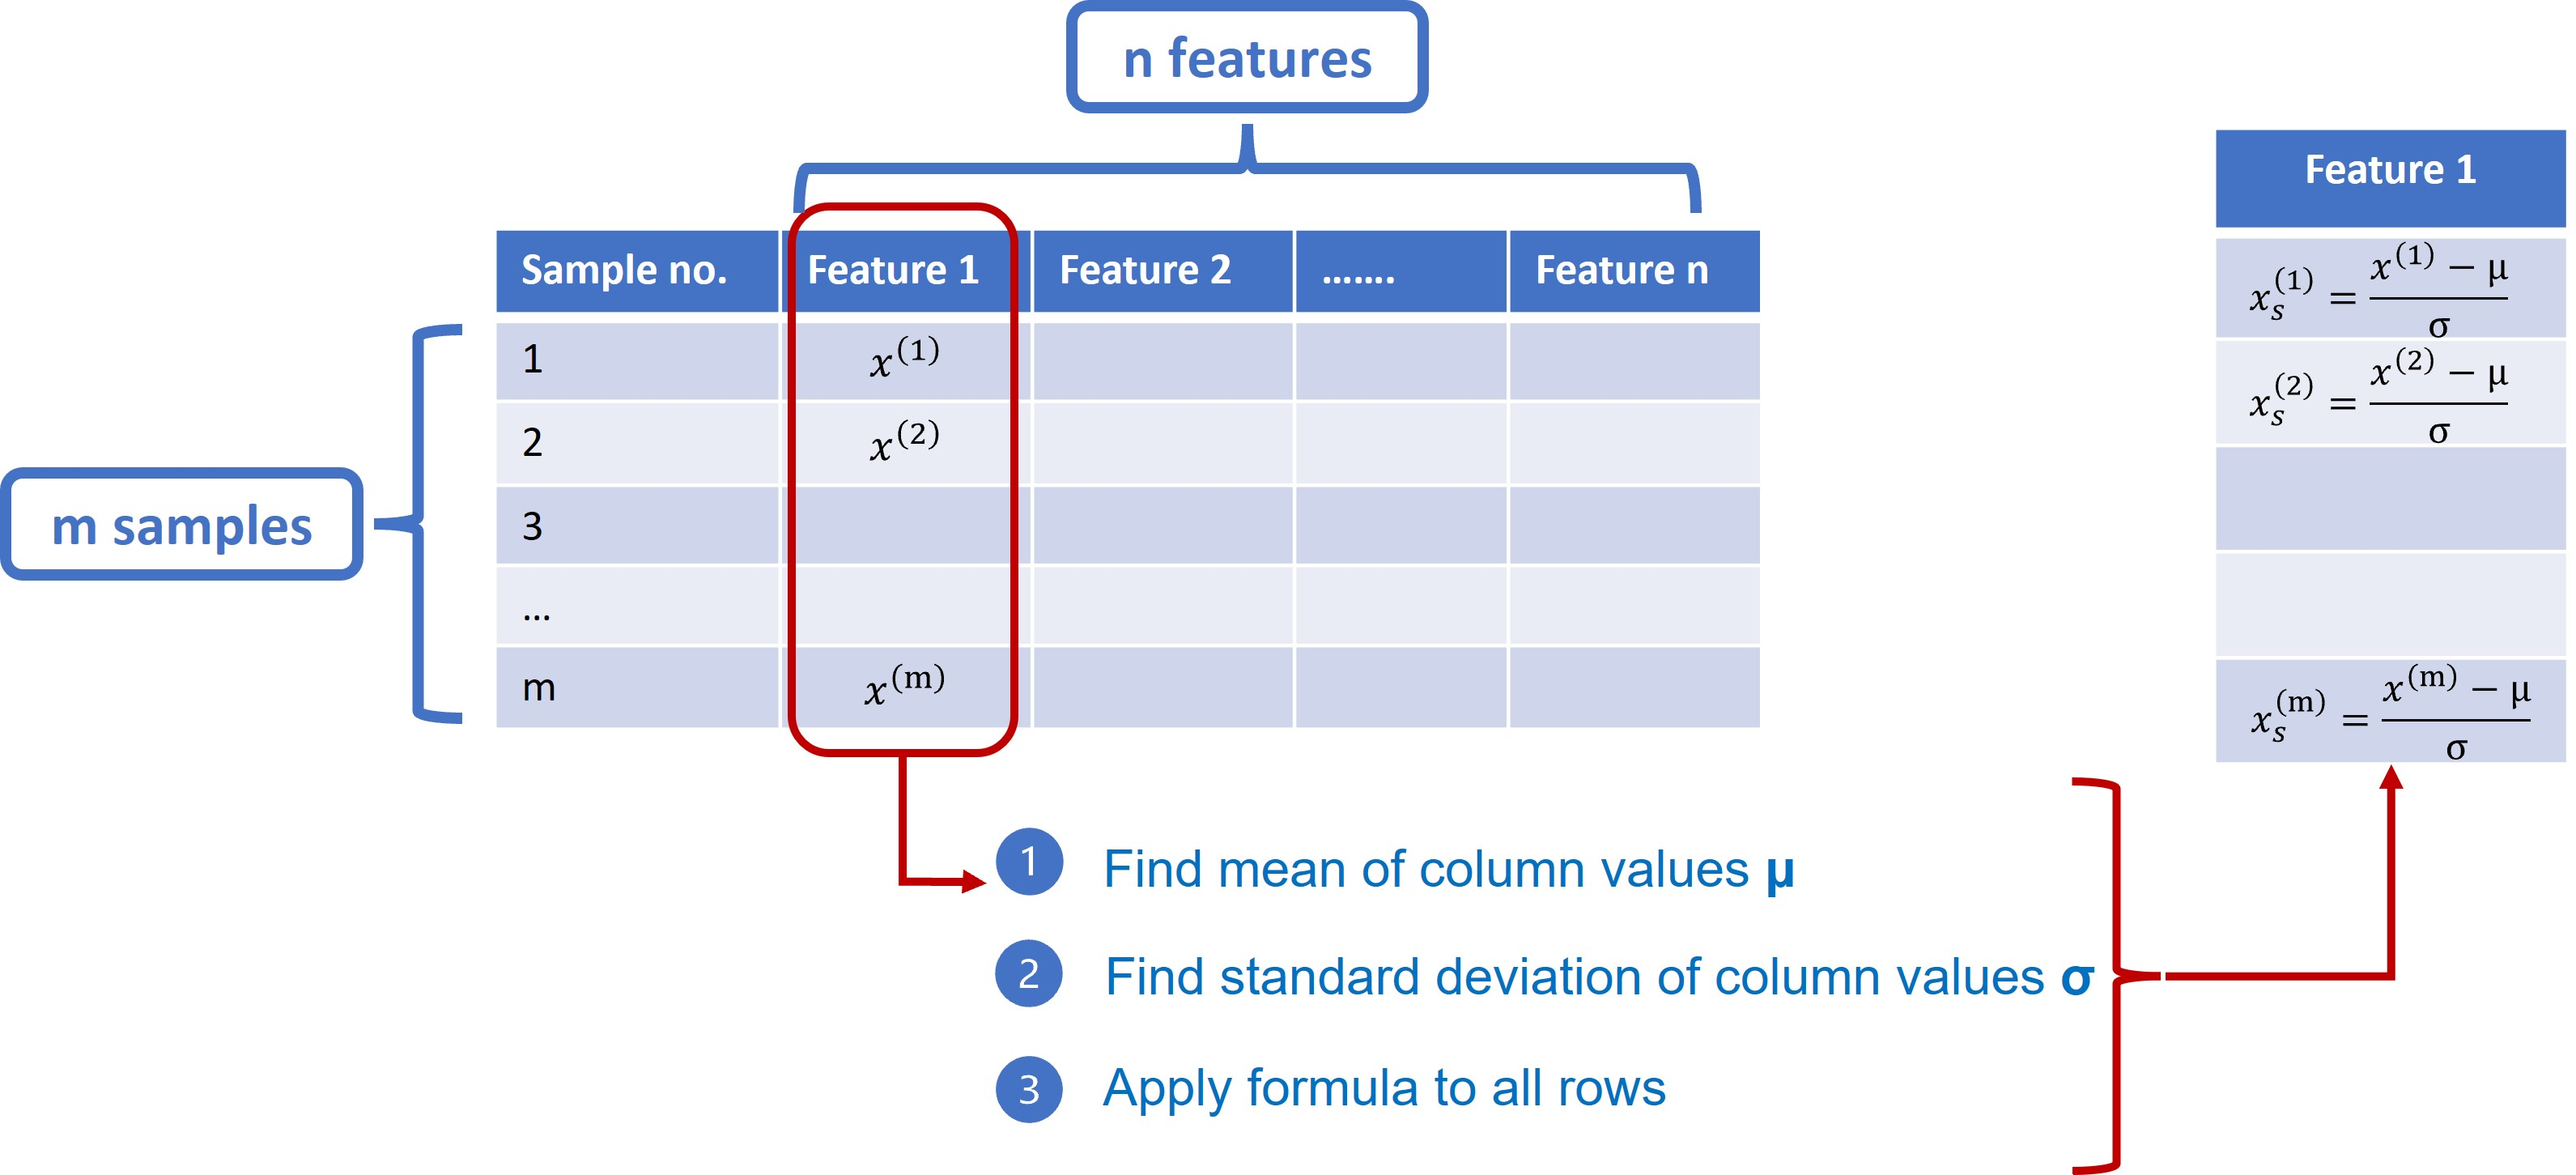
As you can see, we first find the mean, column-wise for a feature. Then we find the standard deviation and then we apply the above formula for each of the samples to transform that feature into a standardized one. We repeat this procedure for all the feature columns one by one. In addition, standardisation makes the distributions of the features more uniform. **[........ add plot here as an example]**

**NOTE**: If we are in a supervised learning task, then we apply the scaling to all features but not to the label/target column. We avoid this because it might change the interpretation of the target variable. While in the case of unsupervised learning, the standardization may be applied to all columns since there is no target column.

Using this method, the mean of each corresponding feature is subtracted from the values and each of them is scaled to unit variance. Moreover, by using standardization the learning models will not be affected a lot by outliers and the learning process will be smoother. This happens due to some underlying properties of the standard normal distribution that are out of the scope of this notebook.

We can either code the procedure by ourselves or we can use ready-made code from the `sklearn` module. Here you will see an example of how to do standardization using `StandardScaler` from `sklearn`. We will continue using the dataset from the previous section. 
Again, we will start by importing the necessary modules:

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
standard_scaler = StandardScaler()
numerical_part_st = standard_scaler.fit_transform(dataset.iloc[:,3:])
test_set_numerical_st = standard_scaler.transform(test_set.iloc[:, 3:])
dataset_st = pd.concat([dataset.iloc[:, :3], numerical_part_st], axis=0)
test_set_st = pd.concat([test_set.iloc[:, :3], test_set_numerical_st], axis=0)

TypeError: cannot concatenate object of type '<class 'numpy.ndarray'>'; only Series and DataFrame objs are valid